# ***Proyecto: Análisis Estratégico de Alojamientos en Airbnb***

# **Abstract:**

# Objetivo

Este proyecto tiene como finalidad identificar los principales factores que influyen en el éxito de los alojamientos publicados en la plataforma Airbnb. El análisis buscará optimizar la rentabilidad de los anfitriones y brindar información clave para futuras inversiones inmobiliarias vinculadas al turismo.

El mercado de alquileres temporarios ha crecido exponencialmente en los últimos años, impulsado por la demanda turística y la digitalización de las reservas. Conocer qué variables impactan en el precio, la disponibilidad y la popularidad de un alojamiento es crucial para diseñar estrategias competitivas y mejorar el desempeño económico de las propiedades.

# Dataset

El dataset Airbnb_Open_Data.csv contiene información de publicaciones activas en Airbnb, incluyendo la siguiente informacion:

***Datos del alojamiento:***

-	id: Identificador único de cada publicación en Airbnb.

-	name: Nombre que el anfitrión le dio a la publicación del alojamiento.

-	host_id: Identificador único del anfitrión (dueño o encargado de la propiedad).

-	host_name: Nombre del anfitrión que publica el alojamiento.

***Ubicación:***


-	neighbourhood_group: Agrupación de barrios o zonas.

-	neighbourhood: Barrio o área específica donde se ubica el alojamiento.

-	latitude: Coordenada de latitud del alojamiento.

-	longitude: Coordenada de longitud del alojamiento.

***Características del alojamiento:***

-	room_type: Tipo de habitación ofrecida (entera, privada, compartida).

-	price: Precio por noche de la estadía en dólares.

-	minimum_nights: Cantidad mínima de noches requeridas para reservar el alojamiento.

-	number_of_reviews: Número total de reseñas recibidas por el alojamiento.

-	last_review: Fecha de la última reseña recibida.

-	reviews_per_month: Promedio de reseñas recibidas por mes.

-	calculated_host_listings_count: Número de alojamientos que el anfitrión tiene publicados en total.

-	availability_365: Número de días en el año en los que el alojamiento está disponible para ser reservado.

# **Metodología**

-	Análisis Exploratorio de Datos (EDA): Evaluar la distribución de precios, disponibilidad y reseñas según distintos segmentos.

-	Visualizaciones estratégicas: Crear gráficos univariados, bivariados y multivariados para entender la interacción entre variables críticas.

-	Interpretación y generación de insights: Formular recomendaciones basadas en evidencia para maximizar la ocupación y optimizar precios.

# **Se espera identificar:**

-	Qué tipo de alojamiento y qué ubicaciones tienen mayor demanda.

-	Cómo afectan el precio, la cantidad de reseñas y la disponibilidad en la preferencia del cliente.

-	Estrategias de optimización de tarifas y ocupación anual.

Este análisis permitirá a propietarios y potenciales inversores diseñar estrategias de marketing, pricing y posicionamiento más efectivas en el competitivo mercado de alojamientos turísticos.


# **Hipótesis:**

-	¿Cómo varía el precio promedio de los alojamientos según el vecindario?

-	¿Qué tipo de habitación es el más popular en términos de cantidad de reseñas?

-	¿Existe alguna relación entre disponibilidad anual y precio?

-	¿Qué características tienen las propiedades mejor puntuadas?

- ¿Qué combinación de factores maximiza la rentabilidad de un alojamiento en Airbnb?

# **1- Limpieza de datos y Análisis exploratorio de datos (EDA)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# URL-CVS-GitHub:
url = 'https://raw.githubusercontent.com/IturryCamila/Data-Science-Camila-Iturry/refs/heads/main/Airbnb_Open_Data.csv'

# Cargar el archivo especificando low_memory=False para evitar warnings por tipos mixtos
df = pd.read_csv(url, low_memory=False)

# 1ras 5 filas
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# **Duplicados**

In [ ]:
# Chequeo de Duplicados
df.duplicated().sum()

np.int64(541)

In [ ]:
# Visualizacion de Duplicados
df[df.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# **Se identificaron *541* registros duplicado.**

Sin embargo, al analizar las variables ***(NAME, host id, host name, neighbourhood, entre otras)***, se observó que los datos asociados **no son idénticos**.

Por esta razón, no se consideran *duplicados reales*, sino ***variantes legítimas*** dentro del dataset.

# Conclusión: **no se eliminan registros para preservar la integridad del análisis.**

# **Eliminación de columna**

In [ ]:
# Eliminacion de License
df.drop(['license'], axis=1, inplace=True)

In [ ]:
# Verifición de ejecución
print(df.columns)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules'],
      dtype='object')


# **Datos Nulos**

In [ ]:
# Chequeo de Nulos
df.isna().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [ ]:
# Porcentaje de Nulos
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

,0
house_rules,50.810437
last review,15.490404
reviews per month,15.476759
country,0.518524
availability 365,0.436651
minimum nights,0.398639
host name,0.395715
review rate number,0.317742
calculated host listings count,0.310919
host_identity_verified,0.281679


In [ ]:
# Nulos Totales
print("Datos Nulos Restantes:", df.isna().sum().sum())

Datos Nulos Restantes: 88172


*Visualizacion de Nulos*

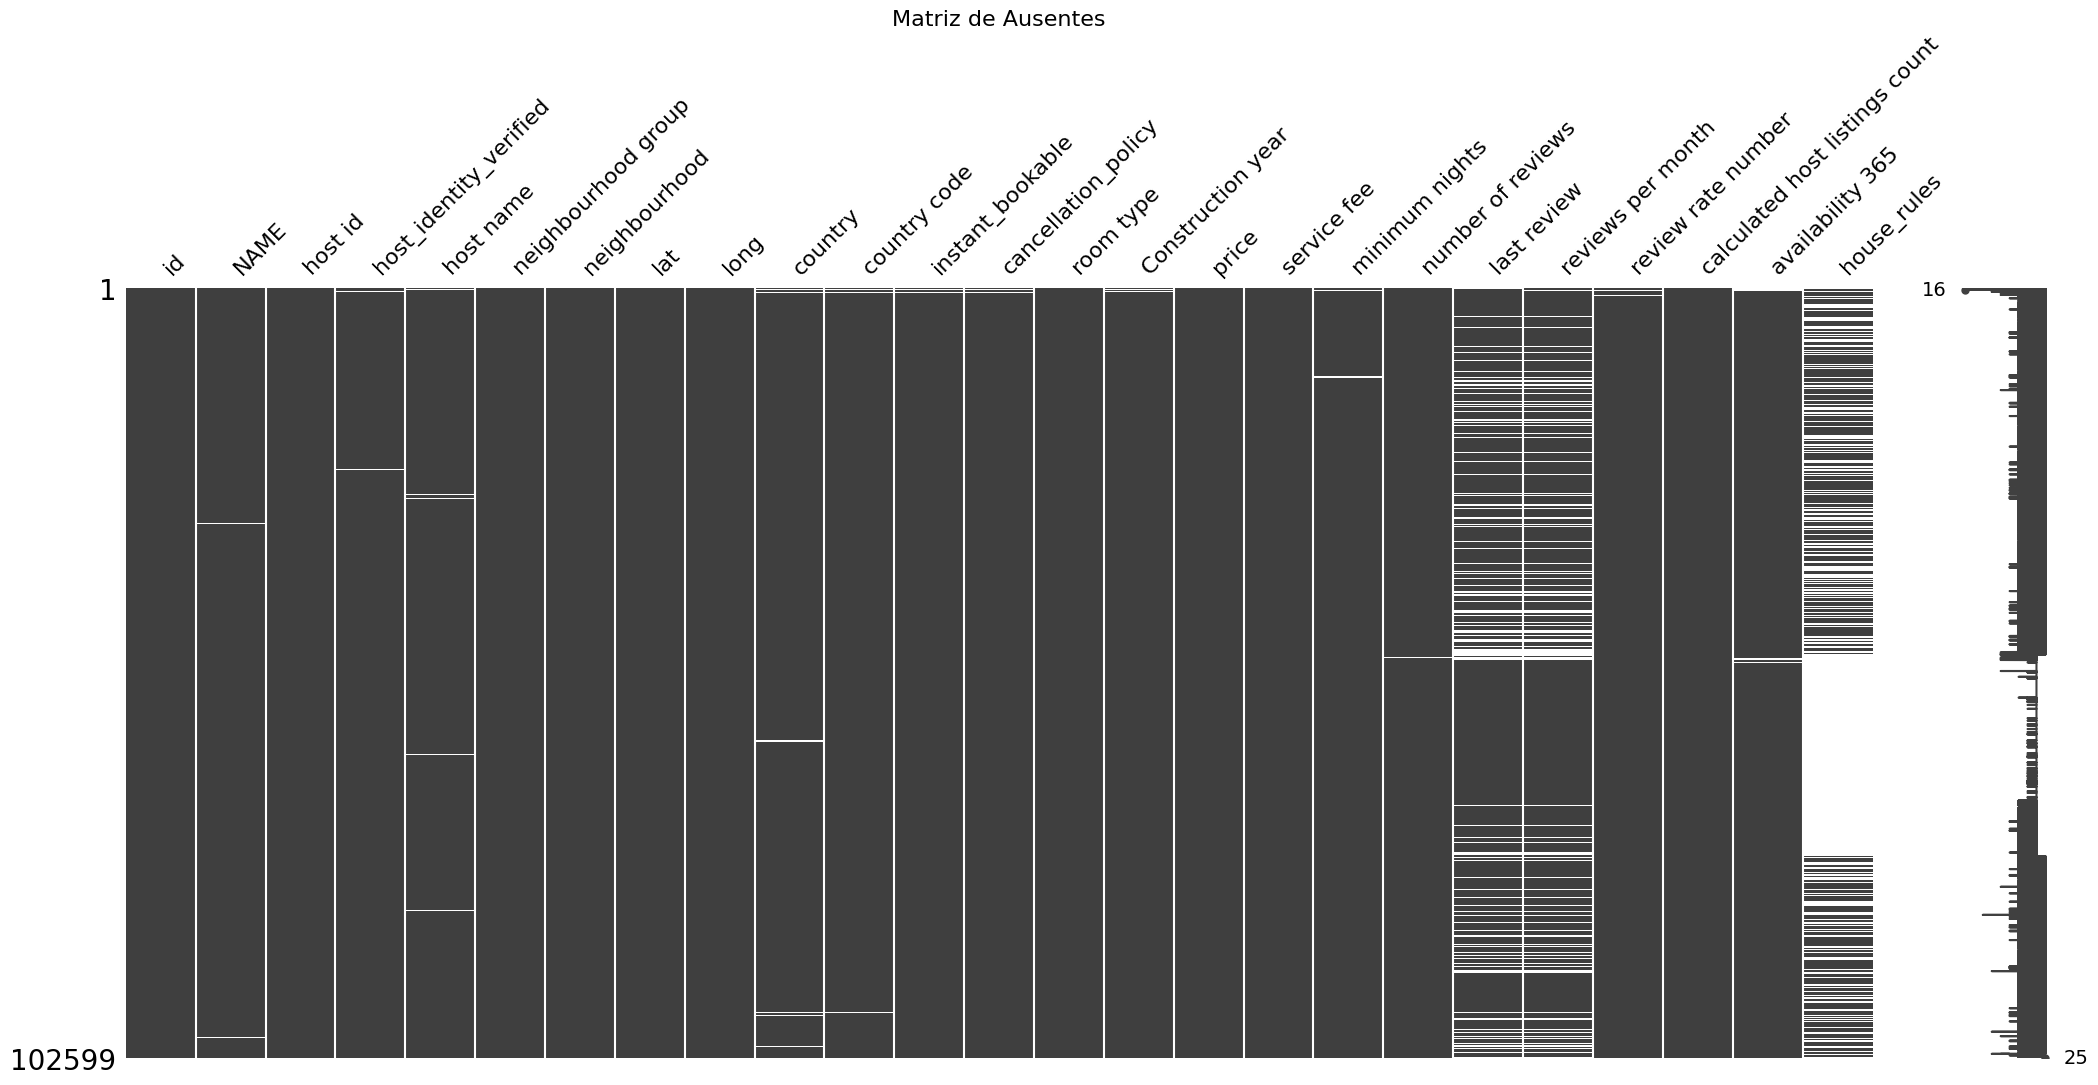

In [ ]:
# Matriz
msno.matrix(df)
plt.title('Matriz de Ausentes',fontsize=16)
plt.show()

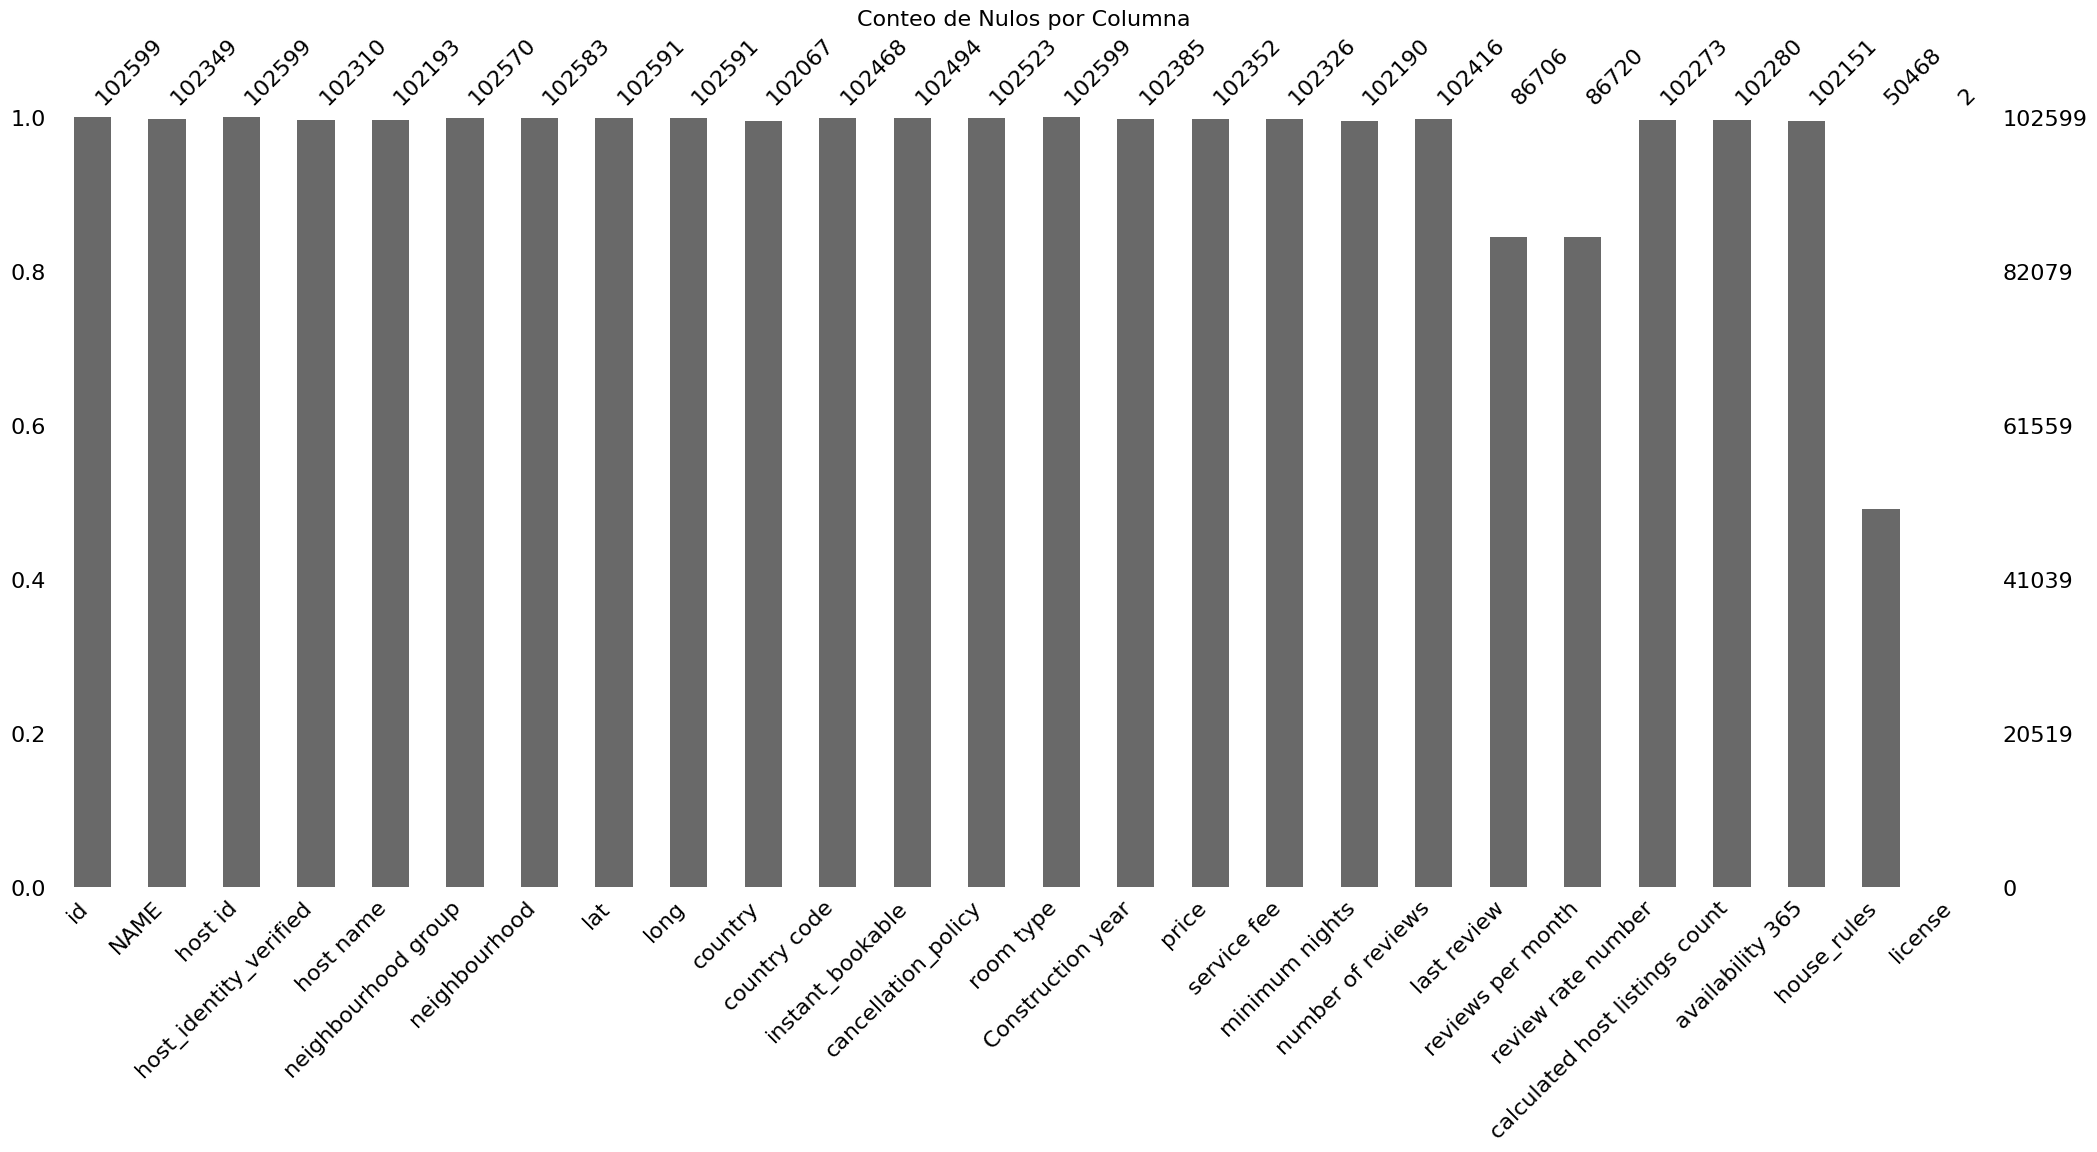

In [ ]:
# Grafico de Barras
msno.bar(df)
plt.title('Conteo de Nulos por Columna',fontsize=16)
plt.show()

# **Imputaciones**

In [ ]:
# Imputar 0 en review per month
df['reviews per month']=df['reviews per month'].fillna(0)
df['reviews per month']=df['reviews per month'].fillna(0)
df['number of reviews']=df['number of reviews'].fillna(0)
df['reviews per month']=df['reviews per month'].fillna(0)
df['review rate number']=df['review rate number'].fillna(0)
df['calculated host listings count']=df['calculated host listings count'].fillna(0)
df['lat']=df['lat'].fillna(0)
df['long']=df['long'].fillna(0)

In [ ]:
# Imputar 'No review' en last review
df['last review']=df['last review'].fillna('No review')

In [ ]:
# Imputar 'Unnamed' en NAME
df['NAME']=df['NAME'].fillna('Unnamed')
df['host name']=df['host name'].fillna('Unnamed')

In [ ]:
# Imputar 'unconfirmed' en host_identity_verified
df['host_identity_verified']=df['host_identity_verified'].fillna('unconfirmed')

In [ ]:
# Imputar 'Lacks' en country code
df['country code']=df['country code'].fillna('Lacks')

In [ ]:
# Imputar 'Unspecified' en neighbourhood group, neighbourhood, country, instant_bookable, cancellation_policy, price, service fee, house_rules
df['neighbourhood group']=df['neighbourhood group'].fillna('Unspecified')
df['neighbourhood']=df['neighbourhood'].fillna('Unspecified')
df['country']=df['country'].fillna('Unspecified')
df['instant_bookable']=df['instant_bookable'].fillna('Unspecified')
df['cancellation_policy']=df['cancellation_policy'].fillna('Unspecified')
df['price']=df['price'].fillna('Unspecified')
df['service fee']=df['service fee'].fillna('Unspecified')
df['house_rules']=df['house_rules'].fillna('Unspecified')
df['Construction year']=df['Construction year'].fillna('Unspecified')
df['minimum nights']=df['minimum nights'].fillna('Unspecified')
df['availability 365']=df['availability 365'].fillna('Unspecified')

# **Chequeo de Nulos**

In [ ]:
# Nulos Totales
print("Datos Nulos Restantes:", df.isna().sum().sum())

Datos Nulos Restantes: 0


# **Limpieza de datos**

In [ ]:
# Función segura para limpiar y convertir a float
def limpiar_precio(valor):
    if isinstance(valor, str):
        valor = valor.replace('$', '').replace(',', '').strip()
        try:
            return float(valor)
        except ValueError:
            return None  # Si no puede convertirse, lo deja como NaN
    return valor

# Aplicar a las columnas de precios
df['price'] = df['price'].apply(limpiar_precio)
df['service fee'] = df['service fee'].apply(limpiar_precio)

In [ ]:
# Convertir 'last review' a tipo fecha
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [ ]:
#Limpieza de datos sucios en 'year'
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['year'] = df['last review'].dt.year
print(df['year'].sort_values().unique())
df = df[(df['year'] >= 2016) & (df['year'] <= 2025)]
print(f"Cantidad de registros después del filtrado: {df.shape[0]}")

[2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2024.
 2025. 2026. 2040. 2058.   nan]
Cantidad de registros después del filtrado: 84477


In [ ]:
# Cuantos registros 'meses' hay por año
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df_filtered = df[(df['last review'].dt.year >= 2016) & (df['last review'].dt.year <= 2025)].copy()
df_filtered['year'] = df_filtered['last review'].dt.year
df_filtered['month'] = df_filtered['last review'].dt.month
conteo_meses = df_filtered.groupby(['year', 'month']).size().reset_index()
conteo_meses_anuales = conteo_meses.groupby('year')['month'].nunique()

conteo_meses_anuales

,month
year,
2016,12
2017,12
2018,12
2019,7
2020,11
2021,12
2022,5
2024,1
2025,1


In [ ]:
#Convertir 'availability 365' en numeros
df['availability 365'] = pd.to_numeric(df['availability 365'], errors='coerce')

## **Separacion de columnas en numéricas y categoricas**

In [ ]:
# Columnas numéricas y categoricas
def separar_columnas(df):
  columnas_numericas=df.select_dtypes(include='number').columns
  columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
  return columnas_numericas, columnas_categoricas

columnas_numericas, columnas_categoricas = separar_columnas(df)
print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)

Columnas numéricas: Index(['id', 'host id', 'lat', 'long', 'price', 'service fee',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')
Columnas categóricas: Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year',
       'minimum nights', 'house_rules'],
      dtype='object')


In [ ]:
# Variables Numericas
df.describe()

,id,host id,lat,long,price,service fee,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102599.000000,102599.000000,102352.000000,102326.000000,102599.000000,86706,102599.000000,102599.000000,102599.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.724918,-73.943878,625.293536,125.026924,27.434722,2019-06-12 03:40:52.065601024,1.161368,3.268687,7.911929,141.133254
min,1.001254e+06,1.236005e+08,0.000000,-74.249840,50.000000,10.000000,0.000000,2012-07-11 00:00:00,0.000000,0.000000,0.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688730,-73.982580,340.000000,68.000000,1.000000,2018-10-28 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,624.000000,125.000000,7.000000,2019-06-14 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,913.000000,183.000000,30.000000,2019-07-05 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,0.000000,1200.000000,240.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.363939,0.654847,331.671614,66.325739,49.478373,NaN,1.680924,1.295823,32.171688,135.435024


In [ ]:
# Variables Categoricas
df[columnas_categoricas].describe()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,house_rules
count,102599,102599,102599,102599,102599,102599,102599,102599,102599,102599,102599.0,102599.0,102599
unique,61282,2,13191,8,225,2,2,3,4,4,21.0,154.0,1977
top,Unnamed,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt,2014.0,1.0,Unspecified
freq,250,51489,881,43792,7937,102067,102468,51474,34343,53701,5243.0,25421.0,52131


# **Agrupación de Tiempo**

In [ ]:
# Año, Mes, Trimestre
df['last review'] = pd.to_datetime(df['last review'])
df['year'] = df['last review'].dt.year
df['month'] = df['last review'].dt.month
df['quarter'] = df['last review'].dt.quarter
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,year,month,quarter
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,2021.0,10.0,4.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,2022.0,5.0,2.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,0.0,NaT,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,NaN,NaN
3,1002755,Unnamed,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,270.0,2019-07-05,4.64,4.0,1.0,322.0,Unspecified,2019.0,7.0,3.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",2018.0,11.0,4.0


# **Conclusión de la Limpieza y Preparación de Datos**

**1. Detección y Análisis de Duplicados**

•	Se identificaron 541 registros duplicados mediante df.duplicated(). Los cual se conservaron ya no eran iguales entre si.

**2. Eliminación de Columnas**

•	Se eliminó la columna license mediante drop(), porque contenía un alto porcentaje de datos nulos (más del 95%) y no aportaba valor significativo al análisis.

**3. Datos Faltantes (Nulos)**

•	Se realizó un chequeo exhaustivo de nulos, identificando altos niveles de ausencias en columnas como house_rules, last review, country, entre otras.

•	Se aplicaron estrategias de imputación basadas en el tipo de variable:

*-	Variables Numéricas (reviews per month, number of reviews, review rate number, lat, long, etc.): imputadas con 0 cuando correspondía.*

*-	Variables Categóricas (NAME, host name, host_identity_verified, country, neighbourhood, cancellation_policy, etc.): Se imputaron valores como 'Unnamed', 'Unspecified', 'Lacks', o 'No review' según el contexto de cada columna.*

**•	Resultado Final: Sin datos nulos (Datos Nulos Restantes: 0).**

**4. Limpieza de datos**

•	Se limpio los datos no numericos de las columnas 'price' y 'service fee'.


**5. Clasificación de Variables**

•	Se diferenciaron correctamente columnas numéricas (8 columnas) de columnas categóricas (17 columnas).

**6. Descripción de Variables**

•	Se utilizó describe() para:

*-	Analizar los estadísticos básicos de las variables numéricas (promedios, medianas, desvíos, etc.).*

*-	Revisar las distribuciones y valores más frecuentes en las variables categóricas.*

# ***¿Cómo impacta todo esto en las futuras visualizaciones?***

**Ahora se puede interpretar correctamente:**

-	Distribuciones geográficas *(gracias a lat/long corregidos).*

-	Comportamiento de precios y políticas *(sin campos vacíos en price, cancellation_policy, etc.).*

-	Análisis de reseñas y actividad *(reviews imputadas).*


# **Visualizaciones Exploratorias Generales**

## **Distribución de tipo de habitación *(room type)***

Gráfico de barras → ***ver qué tipo de habitación es más ofrecido*** *(entero, privado, compartido).*

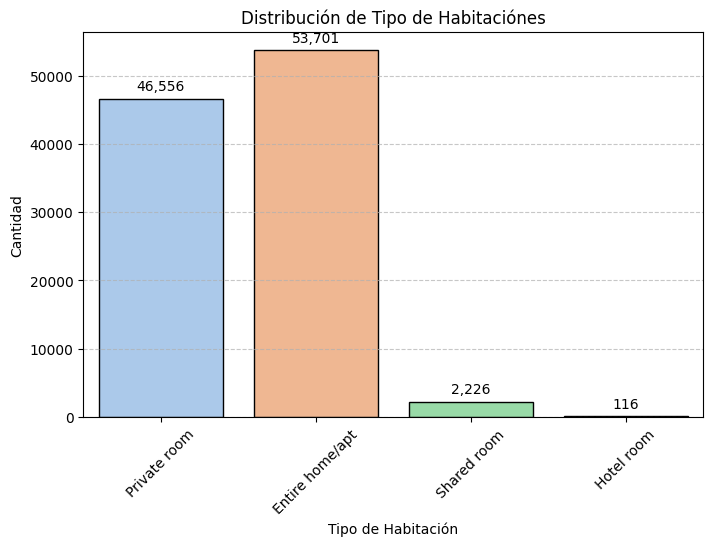

In [ ]:
#Estetica Grafico de Barras
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room type', hue='room type', palette='pastel',edgecolor='black')

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

#Grid y estilo
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.title('Distribución de Tipo de Habitaciónes')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# **Distribución de tipo de habitación (room type)**

Gráfico de Torta → ***ver qué tipo de habitación es más ofrecido (entero, privado, compartido).***

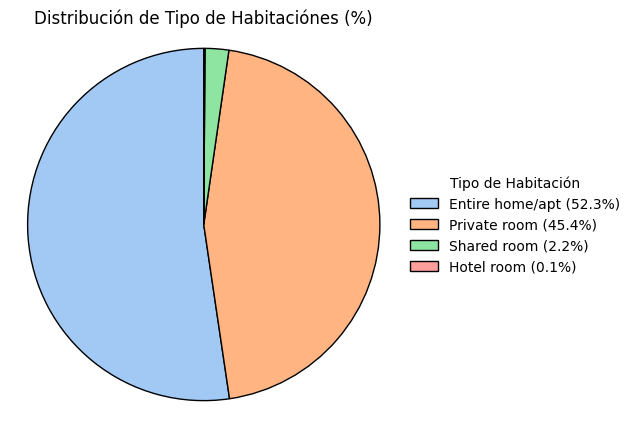

In [ ]:
# Distribución de tipo de habitación
conteo_tipo_de_habitacion = df['room type'].value_counts()

# Calculo de %
percentages = conteo_tipo_de_habitacion / conteo_tipo_de_habitacion.sum() * 100

# Estética Gráfico de barras
color=sns.color_palette('pastel', n_colors=len(conteo_tipo_de_habitacion))
plt.figure(figsize=(5,5))
plt.pie(conteo_tipo_de_habitacion,
         labels=None,
        colors=color,
        startangle=90,
        wedgeprops={'edgecolor': 'black'})

# Ajustar el gráfico
plt.title('Distribución de Tipo de Habitaciónes (%)')
labels = [f'{i} ({j:.1f}%)' for i, j in zip(conteo_tipo_de_habitacion.index, percentages)]
plt.legend(labels,
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           title='Tipo de Habitación',
           frameon=False)
plt.axis('equal')
plt.show()


# **Cantidad de alojamientos por barrio (neighbourhood group o neighbourhood)**

Gráfico de barras → ***¿Dónde se concentra la mayoría de los alojamientos?***

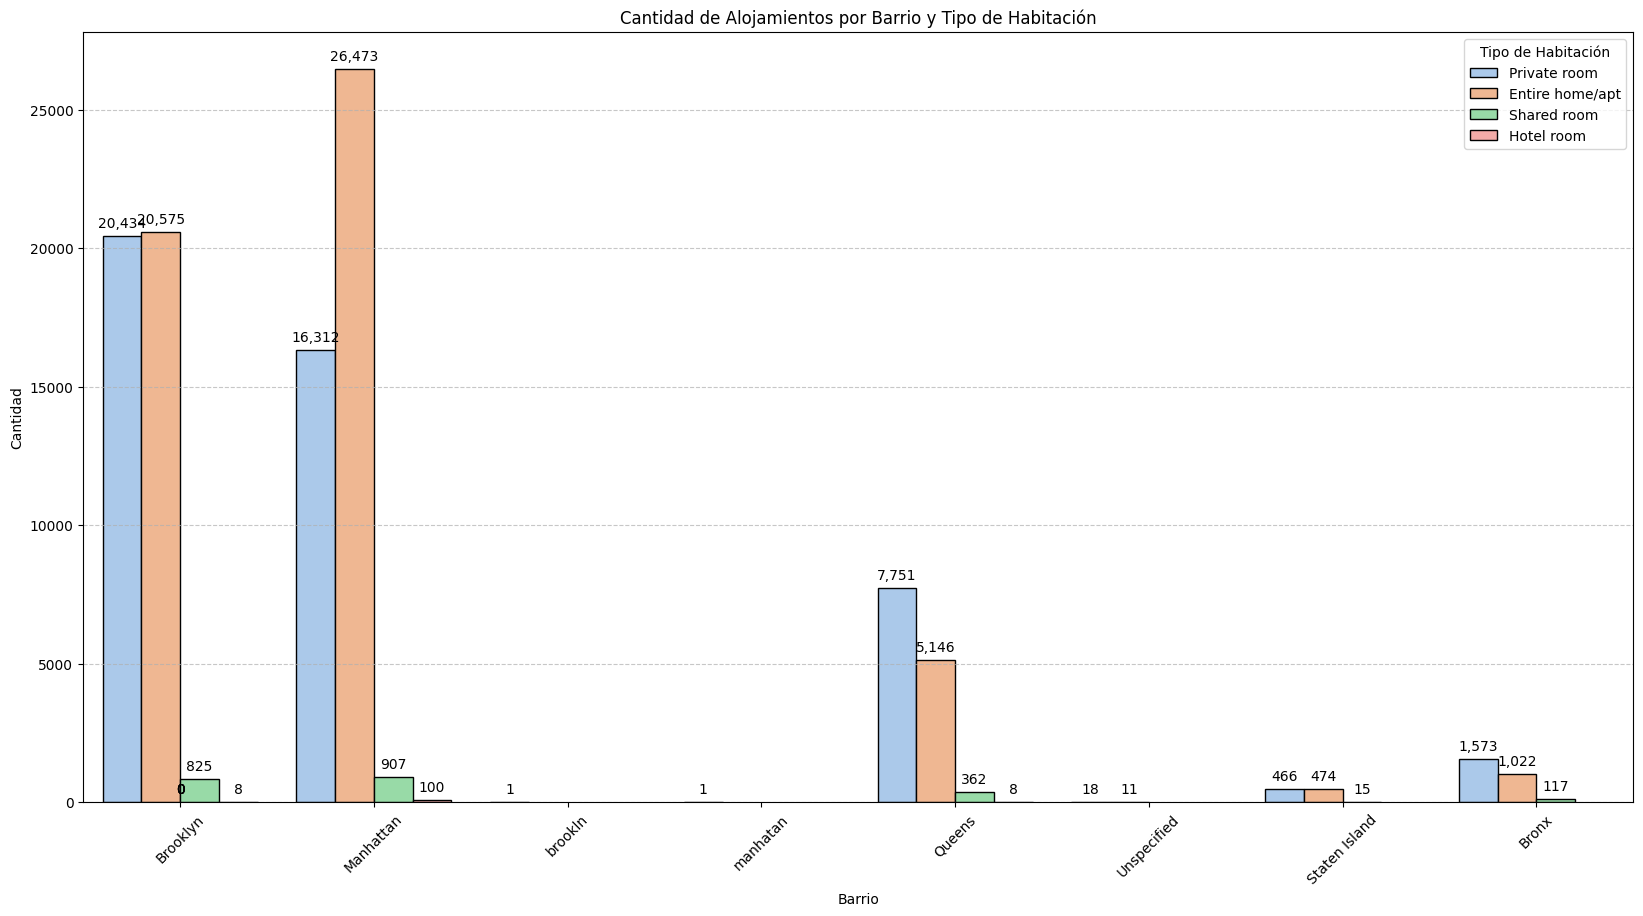

In [ ]:
#Estetica Grafico de barras
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='neighbourhood group', hue='room type', palette='pastel', edgecolor='black')

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

#Grid y estilo
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.title('Cantidad de Alojamientos por Barrio y Tipo de Habitación')
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Habitación')
plt.show()

# **Cantidad de alojamientos por barrio (neighbourhood group o neighbourhood)**

Gráfico de Torta → ***¿Dónde se concentra la mayoría de los alojamientos?***

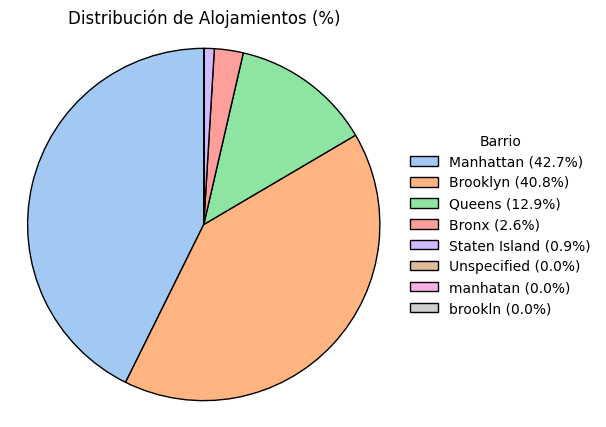

In [ ]:
# % de Distribución de alojamientos
conteo_de_barrios = df['neighbourhood group'].value_counts()

# Calculo de %
percentages = conteo_de_barrios / conteo_de_barrios.sum() * 100

# Estética Gráfico de barras
color=sns.color_palette('pastel', n_colors=len(conteo_de_barrios))
plt.figure(figsize=(5,5))
plt.pie(conteo_de_barrios,
        labels=None,
        colors=color,
        startangle=90,
        wedgeprops={'edgecolor': 'black'})

# Ajustar el gráfico
plt.title('Distribución de Alojamientos (%)')
labels = [f'{i} ({j:.1f}%)' for i, j in zip(conteo_de_barrios.index, percentages)]
plt.legend(labels,
           loc='center left',
           bbox_to_anchor=(1, 0.5),
           title='Barrio',
           frameon=False)
plt.axis('equal')
plt.show()

# **Disponibilidad (availability 365)**

Histograma → ***¿Cuántos alojamientos están disponibles todo el año? ¿Cuántos tienen poca disponibilidad?***


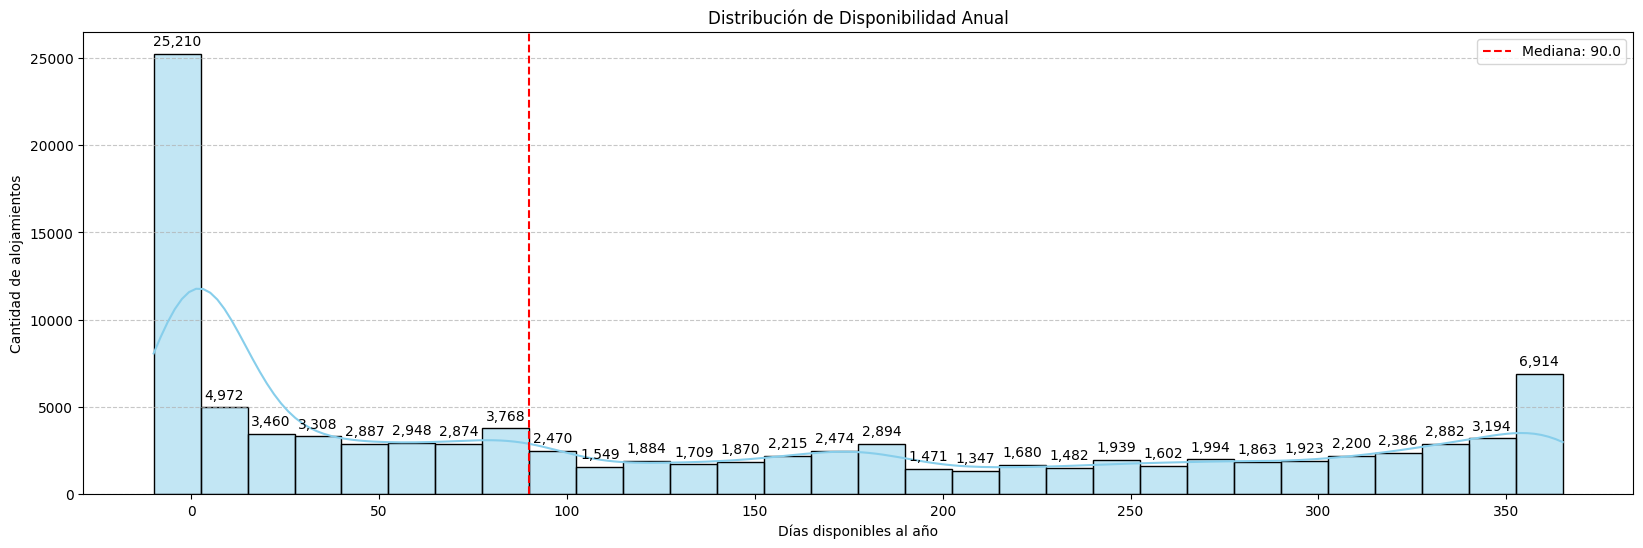

In [ ]:
# Filtro solo alojamiento con disponibilidad entre 0 y 365 dias
df_filtered = df[df['availability 365'] <= 365]

#Estetica de Histograma
plt.figure(figsize=(20,6))
sns.histplot(data=df_filtered, x='availability 365', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.axvline(df_filtered['availability 365'].median(), color='red', linestyle='--', label=f'Mediana: {df_filtered["availability 365"].median()}')
plt.legend()

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

#Grid y estilo
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.title('Distribución de Disponibilidad Anual')
plt.xlabel('Días disponibles al año')
plt.ylabel('Cantidad de alojamientos')
plt.show()

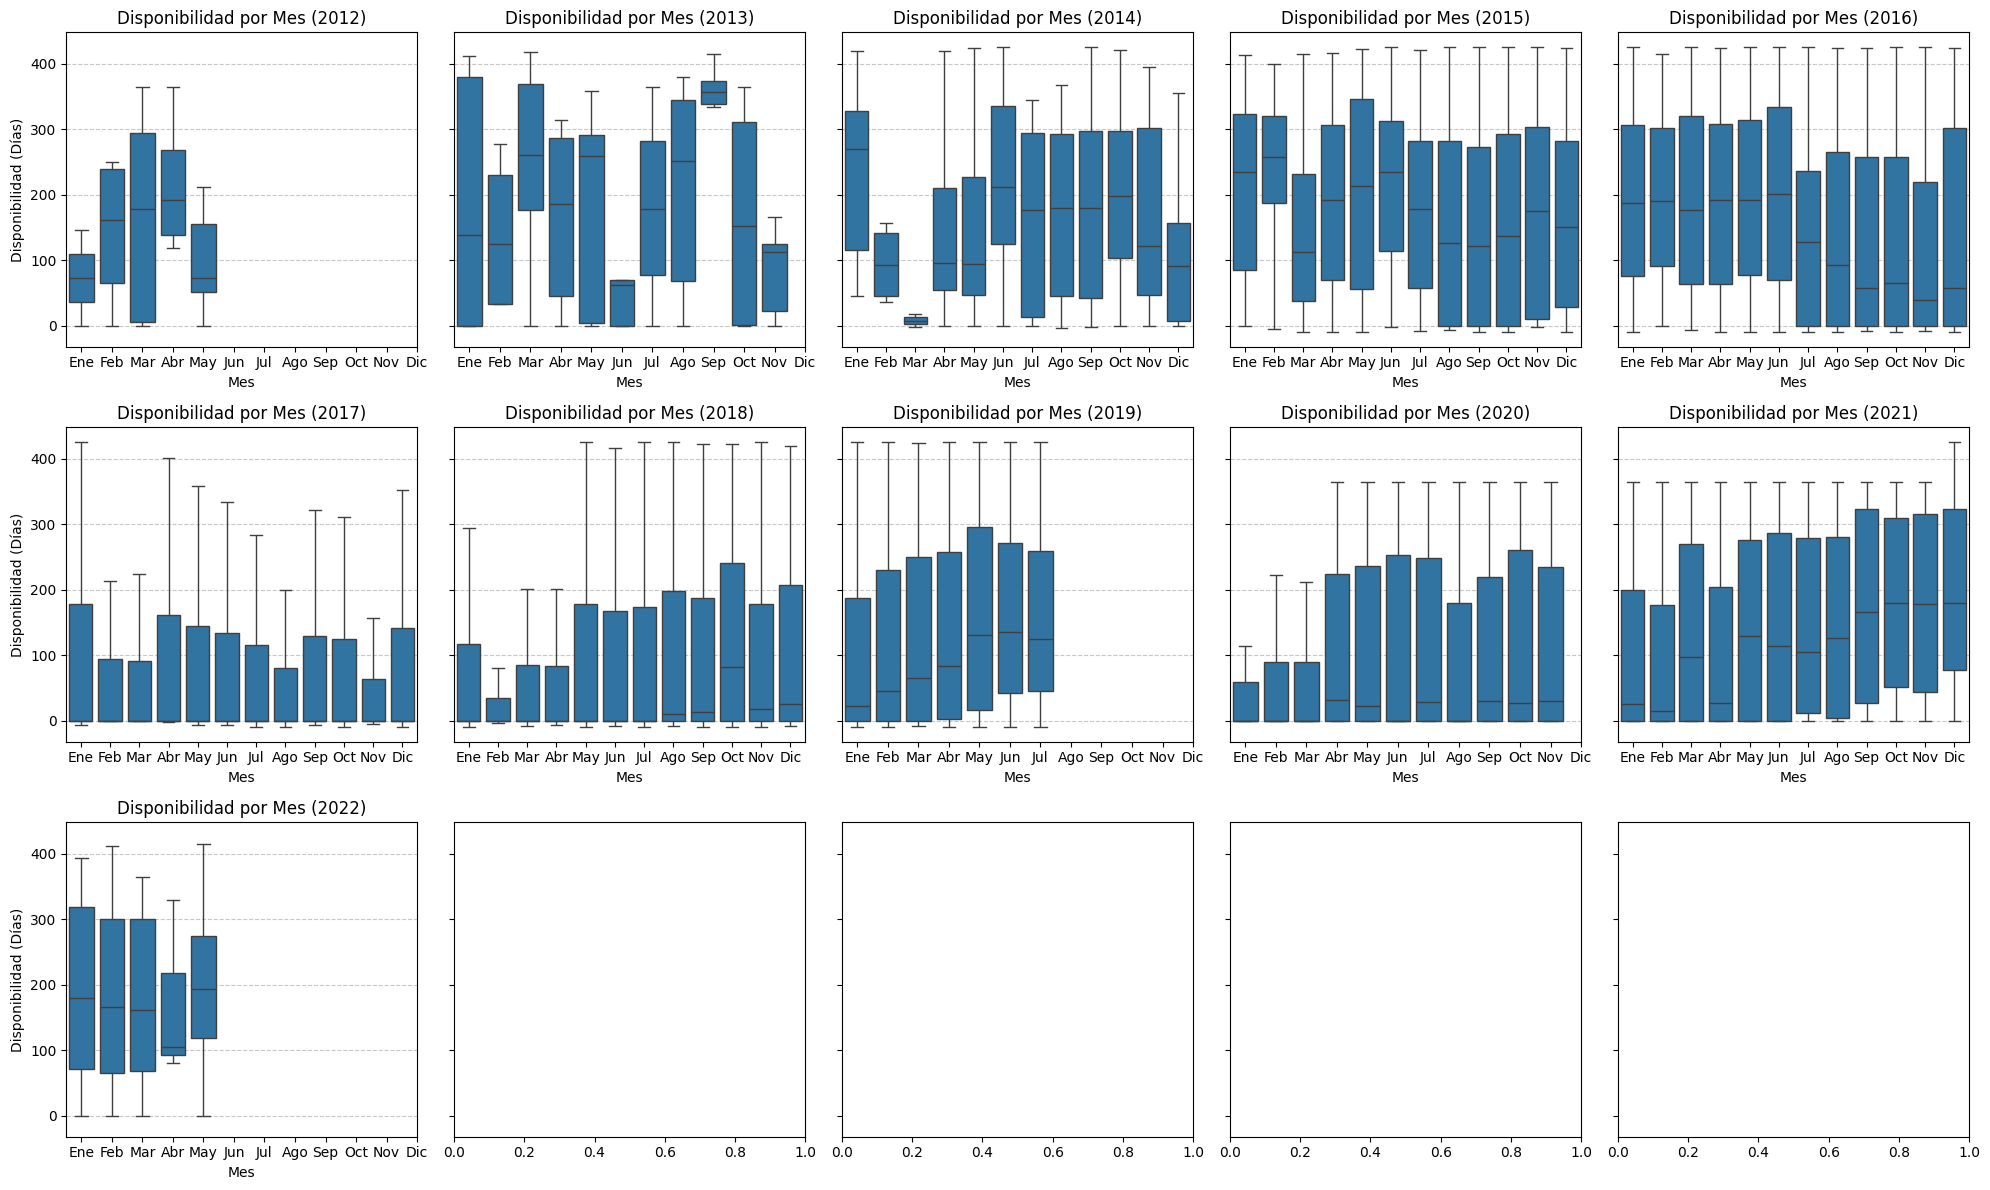

In [ ]:
# Lista de los años que se Visualizaran
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Subgráficos de 3 filas y 5 columnas (para cubrir todos los años)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), sharey=True)

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Grafico por año
for i, year in enumerate(years):
    ax = axes[i]

    # Filtrar los datos para el año específico
    df_year = df[df['year'] == year]

    # Gráfico de barras para mostrar la disponibilidad de los alojamientos por mes para ese año
    sns.boxplot(data=df_year, x='month', y='availability 365', ax=ax, showfliers=False)

    #Grid y estilo
    ax.set_title(f'Disponibilidad por Mes ({year})')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Disponibilidad (Días)')
    ax.set_xticks(range(12))
    ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Espacio entre Graficos
plt.tight_layout()

plt.show()

# **Relación entre precio y tipo de habitación (price vs room type)**

Boxplot → ***¿Cuál es la variación de precios en cada tipo de alojamiento?***

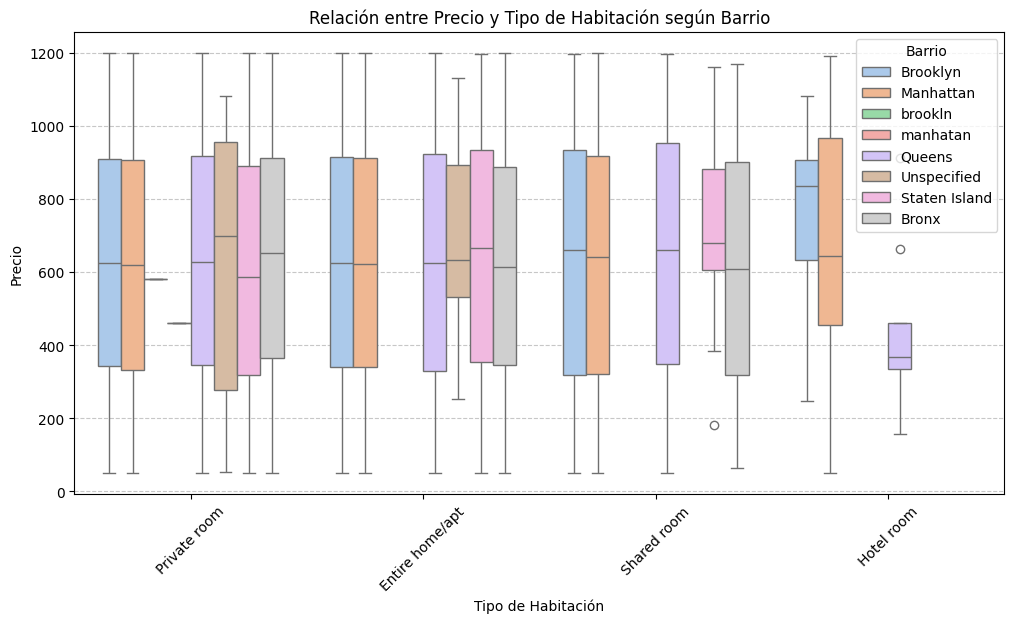

In [ ]:
#Estetica de Histograma
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='room type', y='price', hue='neighbourhood group', palette='pastel')

#Grid y estilo

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Relación entre Precio y Tipo de Habitación según Barrio')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.legend(title='Barrio')
plt.show()

# **Visualizaciones Comparativas Más Específicas**

Objetivo: ***Buscar relaciones o patrones entre variables.***


# **Precio promedio por barrio (neighbourhood group)**

Gráfico de barras → ***¿Qué barrio tiene alojamientos más caros o más baratos?***


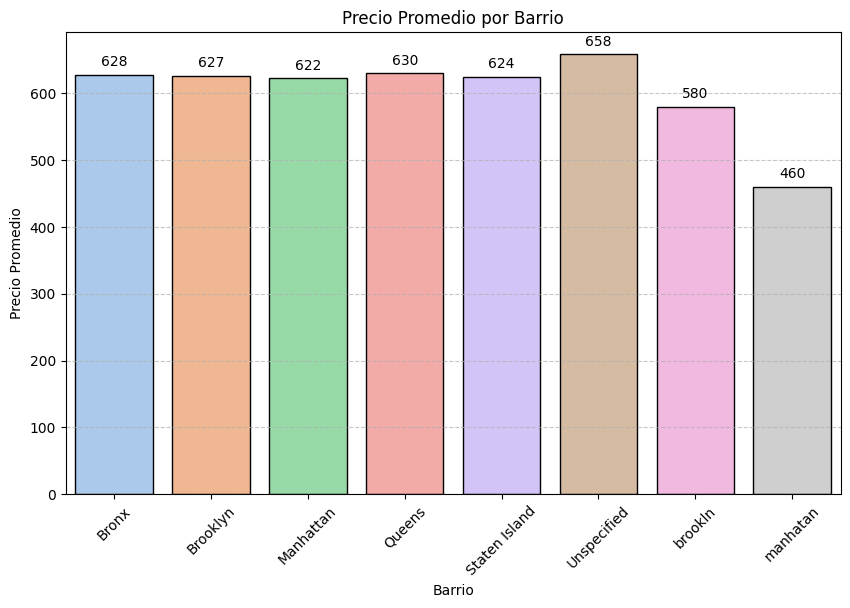

In [ ]:
# Agrupamos para calcular precio promedio
precio_promedio_por_barrio = df.groupby('neighbourhood group')['price'].mean().reset_index()

# Estética Grafic de barras
plt.figure(figsize=(10,6))
sns.barplot(data=precio_promedio_por_barrio, x='neighbourhood group', y='price',hue='neighbourhood group', palette='pastel', edgecolor='black')

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

# Grid y estilo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Precio Promedio por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

# **Precio promedio por barrio (neighbourhood group)**

Gráfico de Torta → ***¿Qué barrio tiene alojamientos más caros o más baratos?***


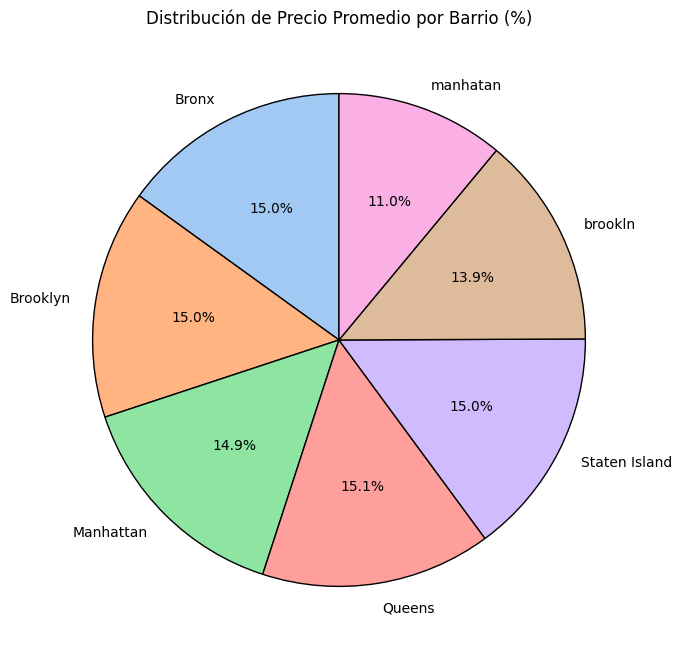

In [ ]:
# Filtro para obviar 'Unspecified' de 'neighbourhood group'
df_filtrado = df[df['neighbourhood group'] != 'Unspecified']

# Promedio de precio por barrio
precio_promedio_por_barrio = df_filtrado.groupby('neighbourhood group')['price'].mean().reset_index()

# Distribución % de precios promedio por barrio
plt.figure(figsize=(8,8))
plt.pie(precio_promedio_por_barrio['price'], labels=precio_promedio_por_barrio['neighbourhood group'], autopct='%1.1f%%',
        colors=sns.color_palette('pastel', n_colors=len(precio_promedio_por_barrio)), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Precio Promedio por Barrio (%)')
plt.show()

# **Número de reseñas vs. precio (number of reviews vs price)**

Scatterplot → ***¿Los alojamientos más caros tienen más o menos reseñas?***


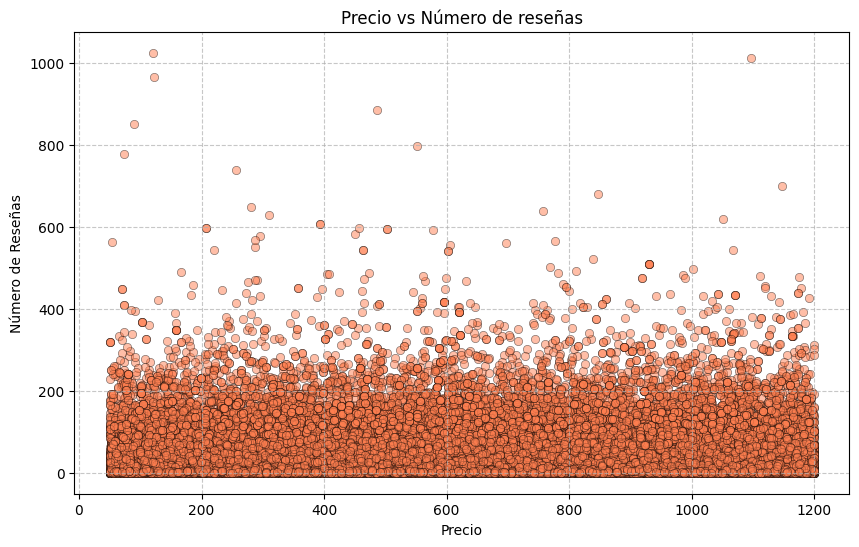

In [ ]:
# Estética Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='number of reviews', alpha=0.5, color='coral', edgecolor='black')
# Grid y estilo
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.title('Precio vs Número de reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.show()

# **Relación entre cantidad de reviews y disponibilidad (number of reviews vs availability 365)**

Scatterplot → ***¿Los alojamientos más disponibles reciben más reviews?***

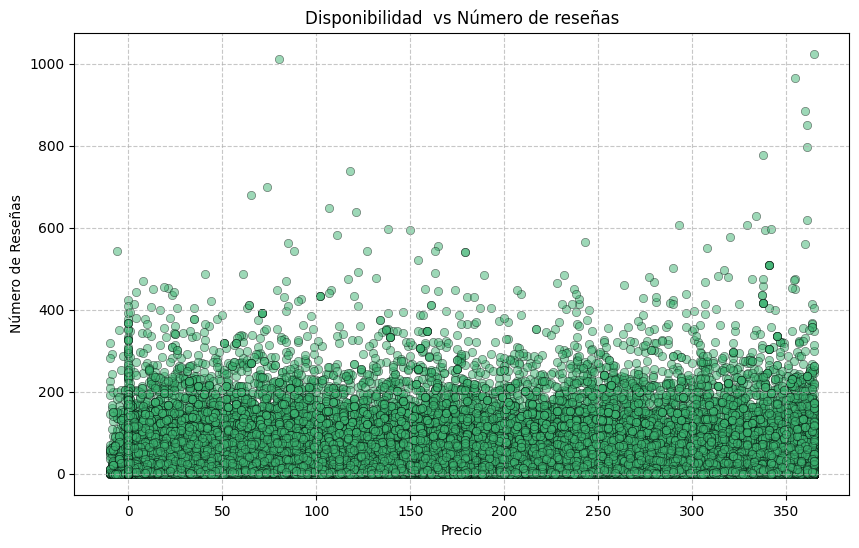

In [ ]:
# Filtro solo alojamiento con disponibilidad entre 0 y 365 dias
df_filtered = df[df['availability 365'] <= 365]

# Estética Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='availability 365', y='number of reviews', alpha=0.5, color='mediumseagreen', edgecolor='black')

# Grid y estilo
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.title('Disponibilidad  vs Número de reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.show()

# **Política de cancelación por barrio (neighbourhood group)**

Gráfico de barras → ***Analizar cómo se distribuyen las políticas de cancelación en diferentes barrios.***

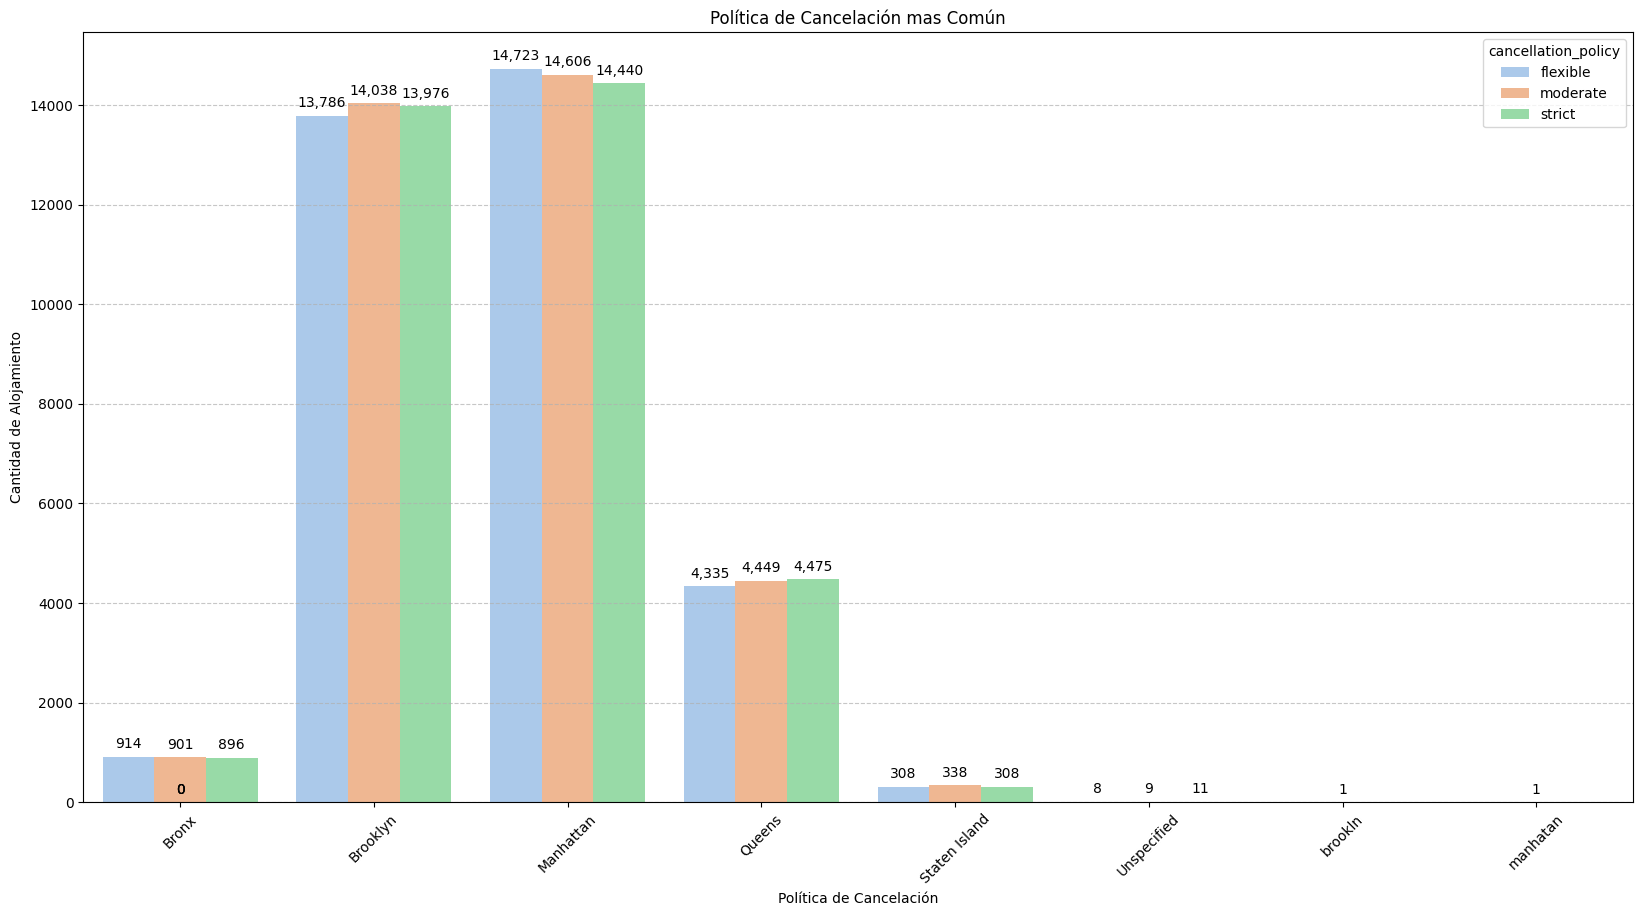

In [ ]:
# Agrupar por barrio y política de cancelación
política_por_barrio = df[df['cancellation_policy'].isin(['flexible', 'moderate', 'strict'])] \
                      .groupby(['neighbourhood group', 'cancellation_policy']).size().reset_index(name='count')

# Estética Gráfico de barras
plt.figure(figsize=(20,10))
sns.barplot(data=política_por_barrio, x='neighbourhood group', y='count', hue='cancellation_policy', palette='pastel')

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

# Grid y estilo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Política de Cancelación mas Común')
plt.xlabel('Política de Cancelación')
plt.ylabel('Cantidad de Alojamiento')
plt.xticks(rotation=45)
plt.show()


# **Visualizaciones de Calidad de Datos o Análisis Extra**

Objetivo: *Mostrar el impacto de tu limpieza de datos y entender mejor los datos categóricos.*


# **Cantidad de alojamientos por estado de verificación del host (host_identity_verified)**

Gráfico de Torta → ***¿Cuántos hosts tienen identidad verificada?***


host_identity_verified
unconfirmed    51489
verified       51110
Name: count, dtype: int64


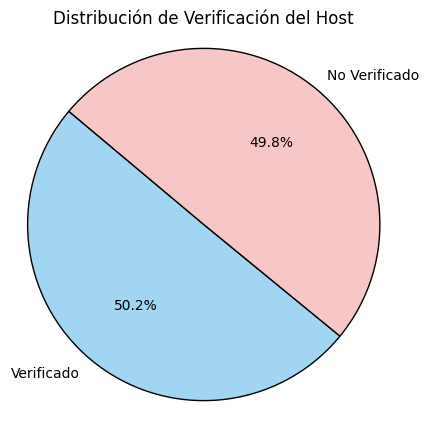

In [ ]:
# Verificación de 'host_identity_verified'
verificacion_host = df['host_identity_verified'].value_counts()

print(df['host_identity_verified'].value_counts())

# Estética Gráfico de barras
plt.figure(figsize=(5,5))
plt.pie(
    verificacion_host,
    labels=['Verificado', 'No Verificado'],
    autopct='%1.1f%%',
    colors=['#A2D5F2', '#F7C6C7'],  # Colores pasteles
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Ajustar el gráfico
plt.title('Distribución de Verificación del Host')
plt.axis('equal')
plt.show()

# **Cantidad de alojamientos con estado de verificación del host por 'neighbourhood group' (host_identity_verified)**

Gráfico de Torta → ***¿Cuántos hosts tienen identidad verificada por 'neighbourhood group'?***

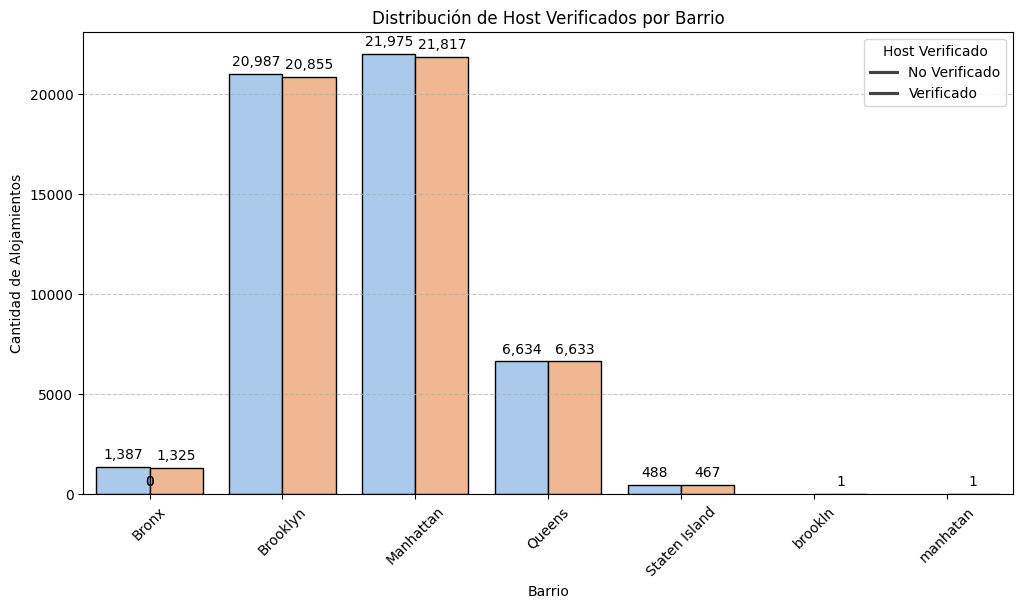

In [ ]:
# Filtro para obviar 'Unspecified' de 'neighbourhood group'
df_filtrado = df[df['neighbourhood group'] != 'Unspecified']

# Agrupar y contar host verificados por neighbourhood group
host_verificado_por_barrio = df_filtrado.groupby(['neighbourhood group', 'host_identity_verified']).size().reset_index(name='count')

# Estética Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(
    data=host_verificado_por_barrio,
    x='neighbourhood group',
    y='count',
    hue='host_identity_verified',
    palette='pastel',
    edgecolor='black'
)

# Agregar % sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       fontsize=10, color='black',
                       xytext=(0, 9), textcoords='offset points')

# Ajustar el gráfico
plt.title('Distribución de Host Verificados por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de Alojamientos')
plt.legend(title='Host Verificado', labels=['No Verificado', 'Verificado'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
